In [70]:
# Importing Library
from datasets import load_dataset
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [71]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


<Axes: xlabel='job_skills'>

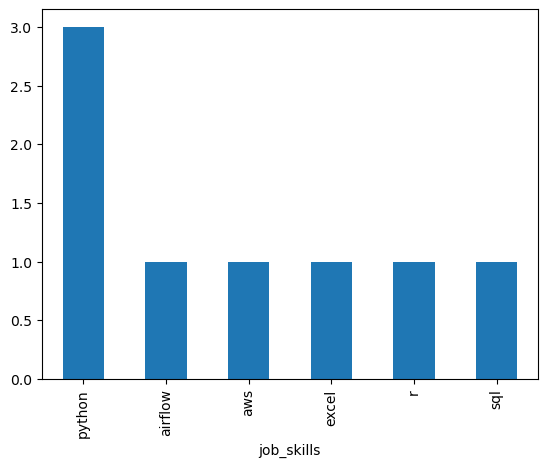

In [72]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [73]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [76]:
df_explode = df.explode('job_skills')

In [96]:
skill_count = df_explode.groupby(['job_title_short', 'job_skills']).size()

type(skill_count)

pandas.core.series.Series

In [97]:
df_skill_count = skill_count.reset_index(name='skill_count')

df_skill_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [105]:
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1175,Machine Learning Engineer,clickup,1
1213,Machine Learning Engineer,gatsby,1
81,Business Analyst,ionic,1
567,Data Analyst,nuxt.js,1


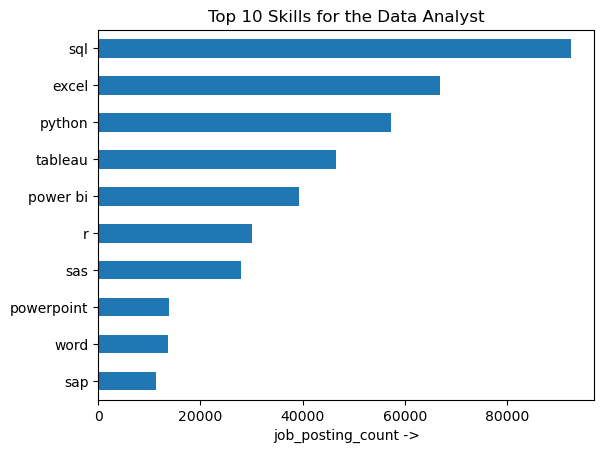

In [120]:
job_title = "Data Analyst"
top_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Skills for the {job_title}")
plt.xlabel("job_posting_count ->")
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

# AI Generated Question

In [121]:
import pandas as pd

data = {
    'person': ['Alice', 'Bob', 'Charlie'],
    'fruit_basket': [['apple', 'banana', 'orange'], ['grape', 'apple'], ['banana', 'kiwi']]
}

df_fruits = pd.DataFrame(data)

In [122]:
# You have a DataFrame df_fruits with a column fruit_basket that contains lists of fruits.
# Convert this column so that each fruit gets its own row.
# Use the explode function to create a new DataFrame df_fruits_exploded where each fruit gets its own row.

df_fruits_explode = df_fruits.explode('fruit_basket')

df_fruits_explode

,person,fruit_basket
0,Alice,apple
0,Alice,banana
0,Alice,orange
1,Bob,grape
1,Bob,apple
2,Charlie,banana
2,Charlie,kiwi


In [125]:
# Use the value_counts function to find out how many times each fruit appears in the DataFrame.

df_fruits_explode.value_counts('fruit_basket')

fruit_basket
apple     2
banana    2
grape     1
kiwi      1
orange    1
Name: count, dtype: int64

In [126]:
# You have a DataFrame df_books with a column authors that contains lists of authors for different books.
# Convert this column so that each author gets their own row and then count the number of books each author has contributed to.

data = {
    'book_title': ['Book A', 'Book B', 'Book C'],
    'authors': [['Author 1', 'Author 2'], ['Author 2', 'Author 3'], ['Author 1', 'Author 4']]
}

df_books = pd.DataFrame(data)

In [127]:
# Use the explode function to create a new DataFrame df_books_exploded where each author gets their own row.

df_books_explode = df_books.explode('authors')

df_books_explode

,book_title,authors
0,Book A,Author 1
0,Book A,Author 2
1,Book B,Author 2
1,Book B,Author 3
2,Book C,Author 1
2,Book C,Author 4


In [134]:
# Use the groupby and size functions to count the number of books each author has contributed to,
# creating a new DataFrame author_counts with columns author and book_count.

author_books_count = df_books_explode.groupby('authors').size()

author_books_count = author_books_count.reset_index(name='books_count')

author_books_count

,authors,books_count
0,Author 1,2
1,Author 2,2
2,Author 3,1
3,Author 4,1


In [135]:
# Given the following DataFrame df_skills, use the explode function to transform the job_skills column so that each skill gets its own row.

import pandas as pd

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

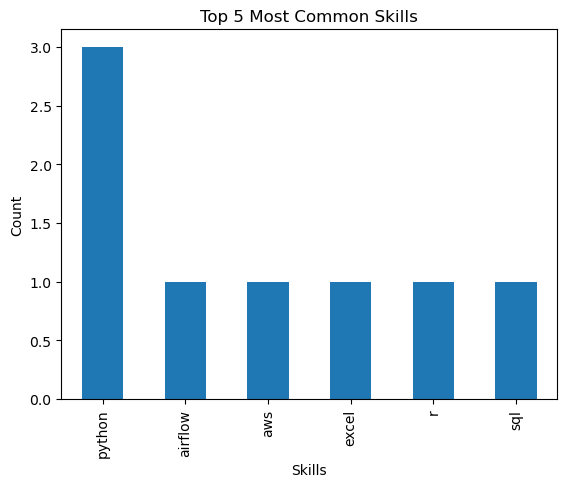

In [141]:
# Using the exploded DataFrame from Problem 1, count the number of occurrences of each skill and display the result.

df_skills_explode = df_skills.explode('job_skills')

skills_count = df_skills_explode.value_counts('job_skills')

skills_count.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 5 Most Common Skills')
plt.show()

In [142]:
# Use the explode() function to create a new DataFrame where each project has its own row.

data = {
    'employee_name': ['Alice', 'Bob', 'Charlie'],
    'projects': [['Project1', 'Project2'], ['Project3'], ['Project4', 'Project5', 'Project6']]
}

df = pd.DataFrame(data)

In [143]:
df_explode = df.explode('projects')

df_explode

,employee_name,projects
0,Alice,Project1
0,Alice,Project2
1,Bob,Project3
2,Charlie,Project4
2,Charlie,Project5
2,Charlie,Project6


In [144]:
data = {
    'job_title': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'skills': [['Excel', 'SQL', 'Python'], ['Python', 'R'], ['AWS', 'Python', 'Airflow']]
}

df = pd.DataFrame(data)

In [146]:
# Use the explode() function to create a new DataFrame where each skill has its own row.
df_explode = df.explode('skills')

df_explode

,job_title,skills
0,Data Analyst,Excel
0,Data Analyst,SQL
0,Data Analyst,Python
1,Data Scientist,Python
1,Data Scientist,R
2,Data Engineer,AWS
2,Data Engineer,Python
2,Data Engineer,Airflow


In [148]:
# Perform a value_counts on the exploded skills column to find the most common skills.

skills_count = df_explode['skills'].value_counts()

skills_count

skills
Python     3
Excel      1
SQL        1
R          1
AWS        1
Airflow    1
Name: count, dtype: int64

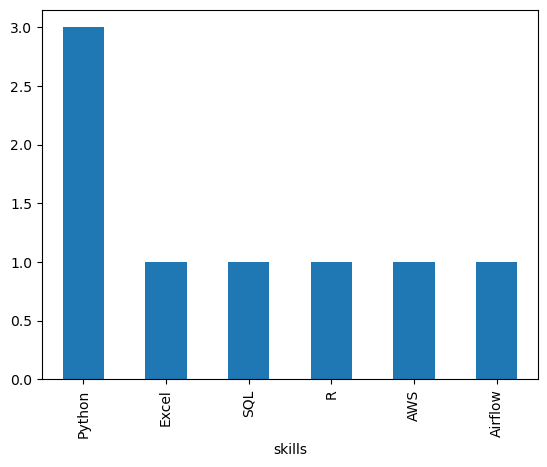

In [150]:
# Plot the results using a bar chart.
skills_count.plot(kind='bar')
plt.show()

In [151]:
import pandas as pd
import ast

data = {
    'job_title': ['Senior Data Engineer', 'Data Analyst', 'Data Engineer'],
    'skills': ['None', '["r", "python", "sql", "nosql", "power bi", "tableau"]', 
               '["python", "sql", "c#", "azure", "airflow", "dax", "docker"]']
}

df = pd.DataFrame(data)

In [152]:
# Convert the string representation of lists in the skills column to actual lists.
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df

,job_title,skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker]"


In [154]:
# Use the explode() function to create a new DataFrame where each skill has its own row.
df_explode = df.explode('skills')

df_explode

,job_title,skills
0,Senior Data Engineer,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
1,Data Analyst,power bi
1,Data Analyst,tableau
2,Data Engineer,python
2,Data Engineer,sql
2,Data Engineer,c#


In [157]:
# Perform a value_counts on the exploded skills column.
skills_count = df_explode['skills'].value_counts()

skills_count

skills
python      2
sql         2
r           1
nosql       1
power bi    1
tableau     1
c#          1
azure       1
airflow     1
dax         1
docker      1
Name: count, dtype: int64

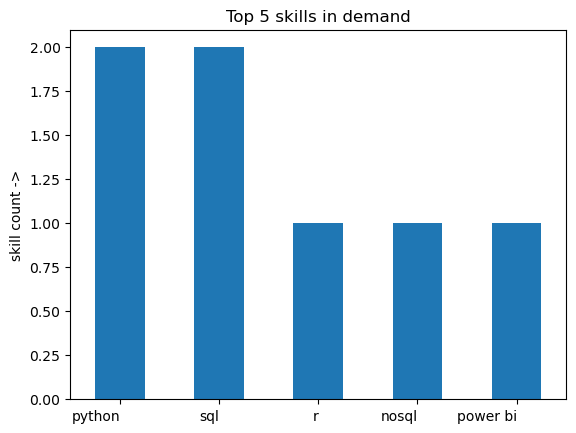

In [162]:
# Plot the top 5 most common skills using a bar chart.
skills_count.head().plot(kind='bar')
plt.title('Top 5 skills in demand')
plt.xlabel('')
plt.ylabel('skill count ->')
plt.xticks(rotation=360, ha='right')
plt.show()